In [1]:
## This file produces the Figure 1 in the paper

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
################### Parameters, Functions and Methods ############################

In [4]:
nsample = 80000
xStep = 0.1
m = 1
C = 3
dt = 0.1
nstep = 50
V = 4

In [5]:
# set random seed
np.random.seed(10)

In [6]:
# set the function U = -2x^2 + x^4 
U = lambda x = None: (- 2 * x ** 2 + x ** 4)
gradU = lambda x = None: (- 4 * x + 4 * x ** 3) + np.random.randn(1) * 2 # gradUPerfect + N(0,4=V)
gradUPerfect = lambda x = None: (- 4 * x + 4 * x ** 3)


In [7]:
# define the HMC method
def hmc(U = None, gradU = None, m = None, dt = None, nstep = None, x = None, mhtest = None): 
    ## HMC using gradU, for nstep, starting at position x
    
    p = np.random.randn(1) * np.sqrt(m)
    oldX = x
    oldEnergy = np.transpose(p) * m * p / 2 + U(x)
    # do leapfrog
    for i in range(nstep):
        p = p - gradU(x) * dt / 2
        x = x + p / m * dt
        p = p - gradU(x) * dt / 2
    
    p = - p
    # M-H test
    if mhtest != 0:
        newEnergy = np.transpose(p) * m * p / 2 + U(x)
        if np.exp(oldEnergy - newEnergy) < np.random.rand(1):
            # reject
            x = oldX
    
    newx = x
    return newx

In [8]:
#define the SGHMC method
def sghmc(U = None, gradU = None, m = None, dt = None, nstep = None, x = None, C = None, V = None): 
    ## SGHMC using gradU, for nstep, starting at position xdell mouse wireless fold
    
    p = np.random.randn(1) * np.sqrt(m)
    B = 0.5 * V * dt
    D = np.sqrt(2 * (C - B) * dt)
    for i in range(nstep):
        p = p - gradU(x) * dt - p * C * dt + np.random.randn(1) * D
        x = x + p / m * dt
    
    newx = x
    return newx

In [9]:
############## Draw probability diagram separately to see more clearly ################

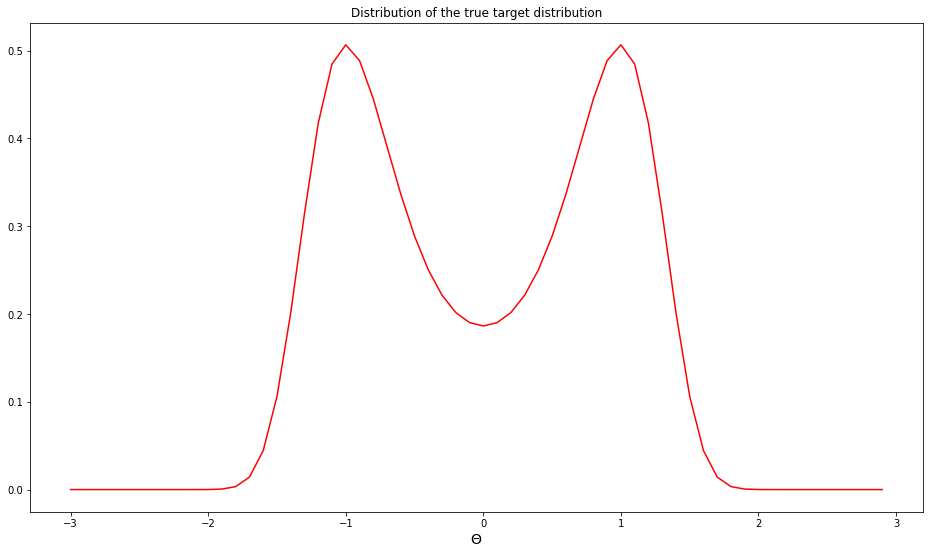

In [19]:
## The true distribution
plt.title('Distribution of the true target distribution')
plt.xlabel(r"${\Theta}$", fontsize=14)

xGrid = np.arange(-3, 3, xStep)
y = np.exp(-U(xGrid)) # use U for true distribution 
y = y / np.sum(y) / xStep
plt.plot(xGrid, y, color='red')

plt.savefig('./Fig1_x4/Fig1_x4_TrueDistribution.jpg')
plt.show()



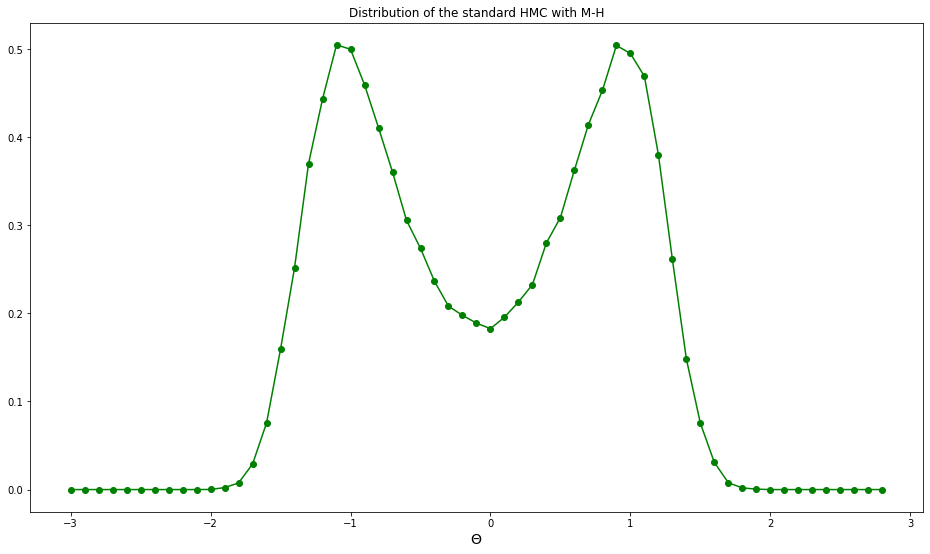

In [20]:
## HMC without noise, standard HMC, with M-H
plt.title('Distribution of the standard HMC with M-H')
plt.xlabel(r"${\Theta}$", fontsize=14)

samples = np.zeros((nsample, 1))
x = 0
for i in range(nsample):
    x = hmc(U, gradUPerfect, m, dt, nstep, x, 1) # use gradUPerfect for standard HMC
    samples[i] = x

xGrid = np.arange(-3, 3, xStep)
yhmc,xhmc = np.histogram(samples, xGrid)
yhmc = yhmc / np.sum(yhmc) / xStep
# To solve the problem of different dimensions, which does not appear in hist() in Matlab,
# Edit the 'bins' argument of `np.histogram` by just putting '+inf' as the last element.
yhmc = np.concatenate((yhmc, [np.inf])) 
plt.plot(xhmc, yhmc, 'go-')

plt.savefig('./Fig1_x4/Fig1_x4_StandardHMCWM.jpg')
plt.show()

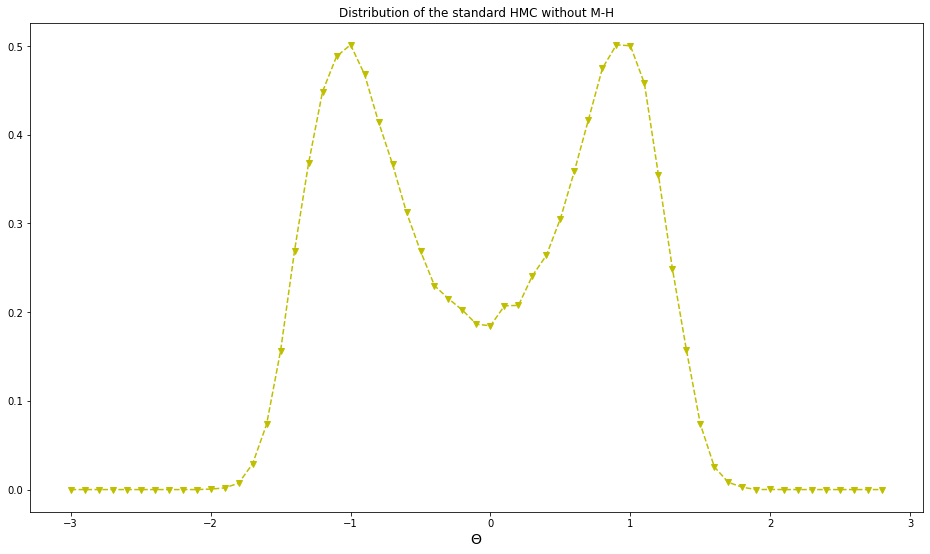

In [21]:
## HMC without noise, standard HMC, without M-H
plt.title('Distribution of the standard HMC without M-H')
plt.xlabel(r"${\Theta}$", fontsize=14)

samples = np.zeros((nsample,1))
x = 0
for i in range(nsample):
    x = hmc(U, gradUPerfect, m, dt, nstep, x, 0) # use gradUPerfect for standard HMC
    samples[i] = x

xGrid = np.arange(-3, 3, xStep)
yhmc,xhmc = np.histogram(samples, xGrid)
yhmc = yhmc / np.sum(yhmc) / xStep
yhmc = np.concatenate((yhmc, [np.inf])) 
plt.plot(xhmc, yhmc, 'y--v')

plt.savefig('./Fig1_x4/Fig1_x4_StandardHMCNM.jpg')
plt.show()

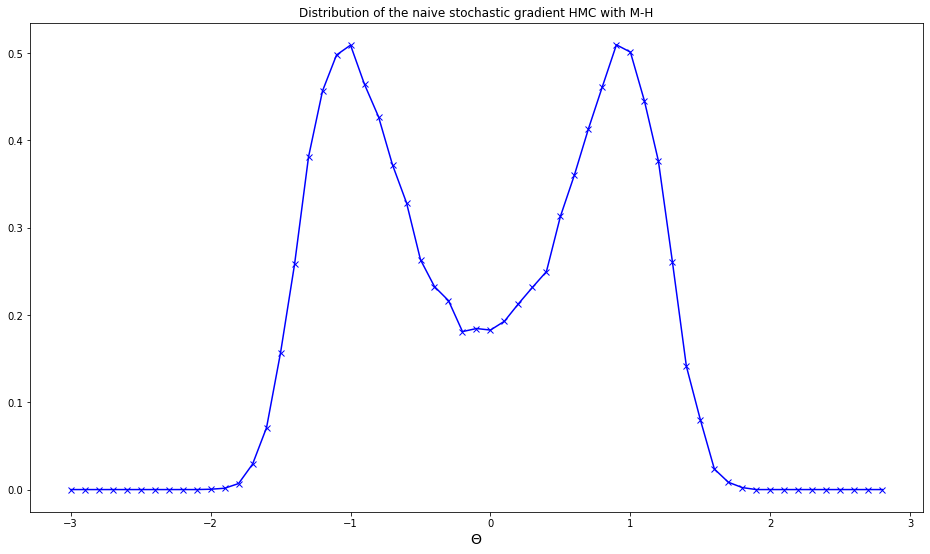

In [22]:
## HMC with noise, naive stochastic gradient HMC, with M-H
plt.title('Distribution of the naive stochastic gradient HMC with M-H')
plt.xlabel(r"${\Theta}$", fontsize=14)

samples = np.zeros((nsample,1))
x = 0
for i in range(nsample):
    x = hmc(U, gradU, m, dt, nstep, x, 1) # use gradU for naive stochastic gradient HMC
    samples[i] = x

xGrid = np.arange(-3, 3, xStep)
yhmc,xhmc = np.histogram(samples, xGrid)
yhmc = yhmc / np.sum(yhmc) / xStep
yhmc = np.concatenate((yhmc, [np.inf])) 
plt.plot(xhmc, yhmc, 'b-x')

plt.savefig('./Fig1_x4/Fig1_x4_NaiveSGHMCWM.jpg')
plt.show()

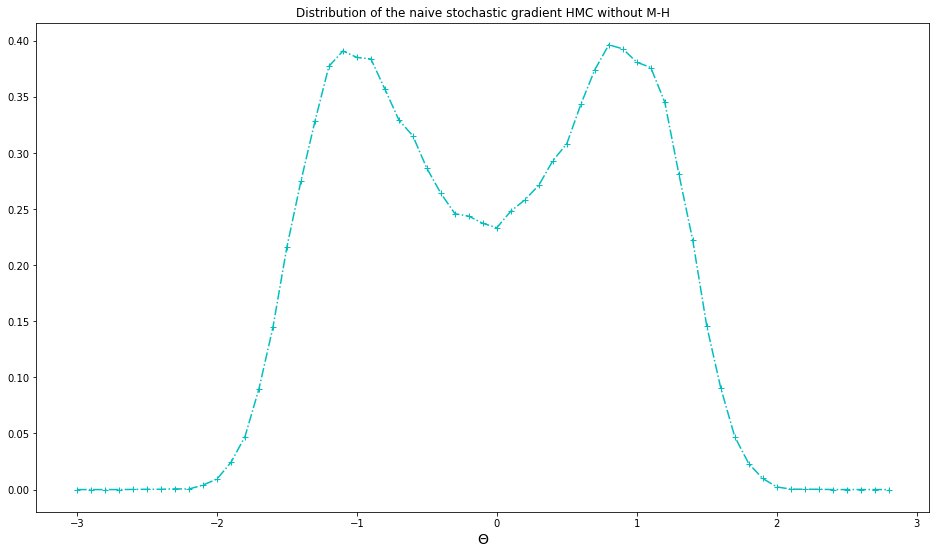

In [23]:
## HMC with noise, naive stochastic gradient HMC, without M-H
plt.title('Distribution of the naive stochastic gradient HMC without M-H')
plt.xlabel(r"${\Theta}$", fontsize=14)

samples = np.zeros((nsample,1))
x = 0
for i in range(nsample):
    x = hmc(U, gradU, m, dt, nstep, x, 0) # use gradU for naive stochastic gradient HMC
    samples[i] = x

xGrid = np.arange(-3, 3, xStep)
yhmc,xhmc = np.histogram(samples, xGrid)
yhmc = yhmc / np.sum(yhmc) / xStep
yhmc = np.concatenate((yhmc, [np.inf])) 
plt.plot(xhmc, yhmc, 'c-.+')

plt.savefig('./Fig1_x4/Fig1_x4_NaiveSGHMCNM.jpg')
plt.show()


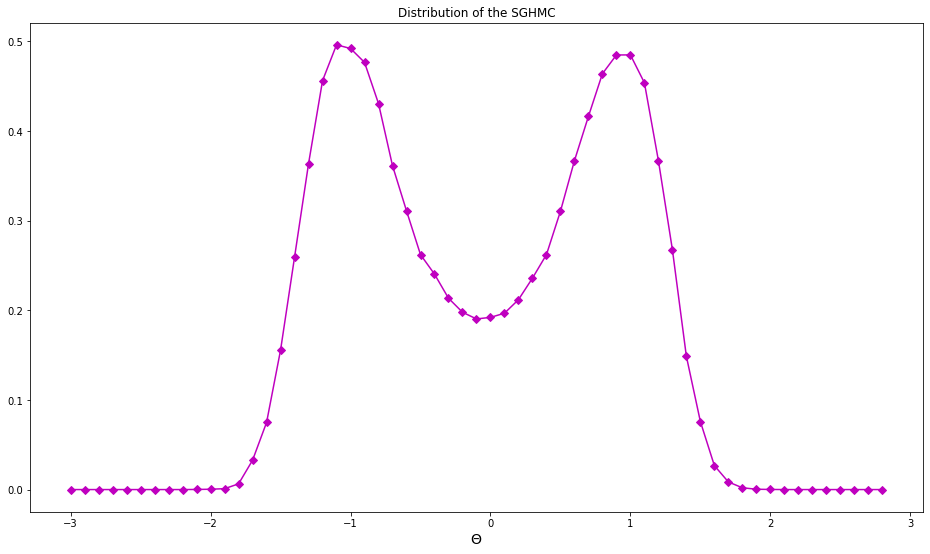

In [24]:
## SGHMC with noise, no M-H
plt.title('Distribution of the SGHMC')
plt.xlabel(r"${\Theta}$", fontsize=14)

samples = np.zeros((nsample,1))
x = 0
for i in range(nsample):
    x = sghmc(U, gradU, m, dt, nstep, x, C, V) # use gradU for SGHMC
    samples[i] = x

xGrid = np.arange(-3, 3, xStep)
yhmc,xhmc = np.histogram(samples, xGrid)
yhmc = yhmc / np.sum(yhmc) / xStep
yhmc = np.concatenate((yhmc, [np.inf])) 
plt.plot(xhmc, yhmc, 'm-D')

plt.savefig('./Fig1_x4/Fig1_x4_SGHMC.jpg')
plt.show()


In [25]:
###### Reproduce figure 1 by drawing empirical dictributions assciated with various sampling methods #############

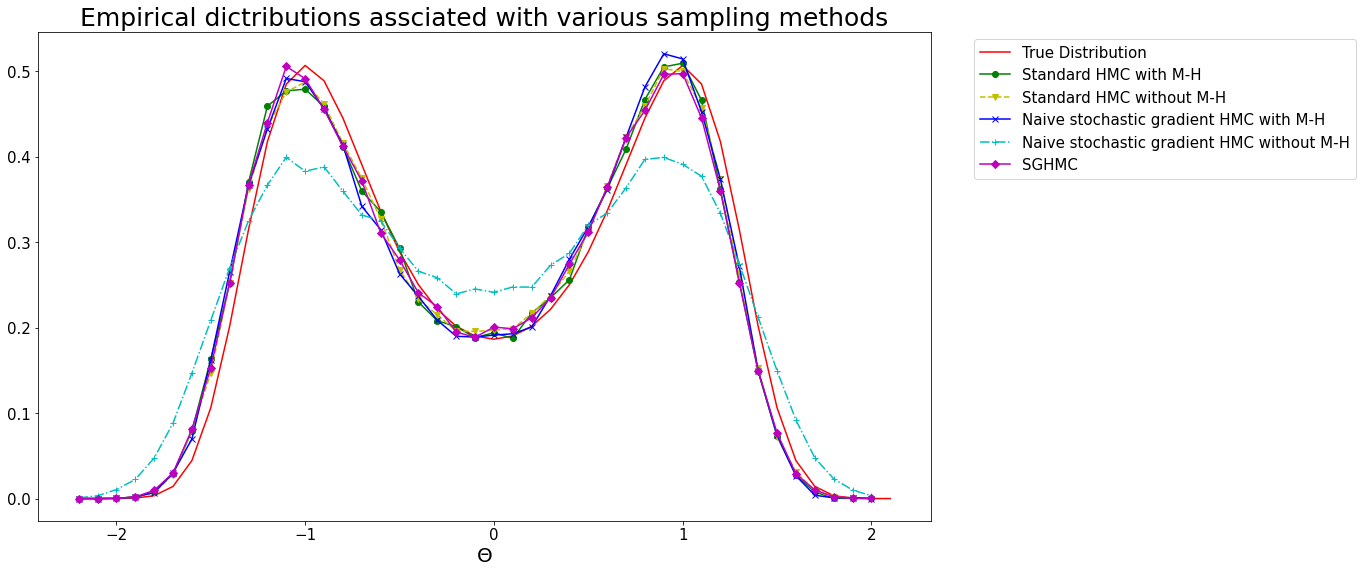

In [26]:
## Set the fig parameters
plt.title('Empirical dictributions assciated with various sampling methods', fontsize=25) # title of the fig
plt.rcParams["figure.figsize"] = [16,9] # the image size: width, length
plt.xlabel(r"${\Theta}$", fontsize=20)  # the x axis label name
plt.tick_params(axis='x', labelsize=15) # the x axis label size
plt.tick_params(axis='y', labelsize=15) # the y axis label size


## Set the theta range
xGrid = np.arange(-2.2, 2.2, xStep)


## True distribution
y = np.exp(-U(xGrid)) # use U for true distribution 
y = y / np.sum(y) / xStep
plt.plot(xGrid, y, color='red', label='True Distribution')


## HMC without noise, standard HMC, with M-H
samples = np.zeros((nsample, 1))
x = 0
for i in range(nsample):
    x = hmc(U, gradUPerfect, m, dt, nstep, x, 1) # use hmc() with gradUPerfect for standard HMC
    samples[i] = x

yshwm,xshwm = np.histogram(samples, xGrid)
yshwm = yshwm / np.sum(yshwm) / xStep
yshwm = np.concatenate((yshwm, [np.inf])) 
plt.plot(xshwm, yshwm, 'go-', label='Standard HMC with M-H')


## HMC without noise, standard HMC, without M-H
samples = np.zeros((nsample,1))
x = 0
for i in range(nsample):
    x = hmc(U, gradUPerfect, m, dt, nstep, x, 0) # use hmc() with gradUPerfect for standard HMC
    samples[i] = x

yshom,xshom = np.histogram(samples, xGrid)
yshom = yshom / np.sum(yshom) / xStep
yshom = np.concatenate((yshom, [np.inf])) 
plt.plot(xshom, yshom, 'y--v', label='Standard HMC without M-H')


## HMC with noise, naive stochastic gradient HMC, with M-H
samples = np.zeros((nsample,1))
x = 0
for i in range(nsample):
    x = hmc(U, gradU, m, dt, nstep, x, 1) # use hmc() with gradU for naive stochastic gradient HMC
    samples[i] = x

ynhwm,xnhwm = np.histogram(samples, xGrid)
ynhwm = ynhwm / np.sum(ynhwm) / xStep
ynhwm = np.concatenate((ynhwm, [np.inf])) 
plt.plot(xnhwm, ynhwm, 'b-x', label='Naive stochastic gradient HMC with M-H')


## HMC with noise, naive stochastic gradient HMC, without M-H
samples = np.zeros((nsample,1))
x = 0
for i in range(nsample):
    x = hmc(U, gradU, m, dt, nstep, x, 0) # use hmc() with gradU for naive stochastic gradient HMC
    samples[i] = x

ynhom,xnhom = np.histogram(samples, xGrid)
ynhom = ynhom / np.sum(ynhom) / xStep
ynhom = np.concatenate((ynhom, [np.inf])) 
plt.plot(xnhom, ynhom, 'c-.+', label='Naive stochastic gradient HMC without M-H')


## SGHMC with noise, no M-H
samples = np.zeros((nsample,1))
x = 0
for i in range(nsample):
    x = sghmc(U, gradU, m, dt, nstep, x, C, V) # use sghmc() with gradU for SGHMC
    samples[i] = x

ysh,xsh = np.histogram(samples, xGrid)
ysh = ysh / np.sum(ysh) / xStep
ysh = np.concatenate((ysh, [np.inf])) 
plt.plot(xsh, ysh, 'm-D', label='SGHMC')


## Save and show the image
# set legends outside avoid overlapping with lines
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", fontsize=15) 
# x4 means x^4, and save fig with legends outside
plt.savefig('./Fig1_x4/Fig1_x4_AllDistributions.jpg', bbox_inches='tight') 
plt.show()

In [ ]:
######### Just some tests for curiosity #########

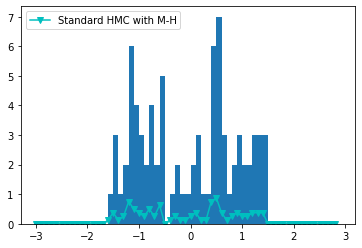

In [16]:
## Test for plt.hist vs np.histogram
## HMC without noise with M-H
samples = np.zeros((nsample, 1))
x = 0
for i in range(nsample):
    x = hmc(U, gradUPerfect, m, dt, nstep, x, 1)
    samples[i] = x

xGrid = np.arange(-3, 3, xStep)
yhmc,xhmc,_ = plt.hist(samples, xGrid) #  still has the same dimension problem as np.histogram
yhmc = yhmc / np.sum(yhmc) / xStep
yhmc = np.concatenate((yhmc, [np.inf])) # just to fix the dimension problem
plt.plot(xhmc, yhmc, 'c-v', label='Standard HMC with M-H')

plt.legend()
plt.show()